# Task :

#### Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?

#### Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?

#### How does Infant and Adult mortality rates affect life expectancy?

#### Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.

#### What is the impact of schooling on the lifespan of humans?

#### Does Life Expectancy have positive or negative relationship with drinking alcohol?

#### Do densely populated countries tend to have lower life expectancy?

#### What is the impact of Immunization coverage on life Expectancy?



# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df =r'C:\Users\rahul\Downloads\Technocolab Assignment\Life Expectancy Prediction\Life Expectancy Data.csv'
data = pd.read_csv(df)

In [4]:
data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [5]:
data.shape

(2938, 22)

In [6]:
data.isnull().sum()


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [7]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [9]:
Country_list = data.Country.unique()  
Country_list

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [10]:
List = ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

In [11]:
for country in Country_list:
    data.loc[data['Country'] == country,List] = data.loc[data['Country'] == country,List].interpolate(method ='linear')
data.dropna(inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1987 non-null   object 
 1   Year                             1987 non-null   int64  
 2   Status                           1987 non-null   object 
 3   Life expectancy                  1987 non-null   float64
 4   Adult Mortality                  1987 non-null   float64
 5   infant deaths                    1987 non-null   int64  
 6   Alcohol                          1987 non-null   float64
 7   percentage expenditure           1987 non-null   float64
 8   Hepatitis B                      1987 non-null   float64
 9   Measles                          1987 non-null   int64  
 10   BMI                             1987 non-null   float64
 11  under-five deaths                1987 non-null   int64  
 12  Polio               

In [13]:
data.shape

(1987, 22)

In [14]:
coldict = {'Life expectancy ':1 , 'Adult Mortality':2 ,
        'Alcohol':3 , 'percentage expenditure': 4, 'Hepatitis B': 5,
       'Measles ' : 6, ' BMI ': 7, 'under-five deaths ' : 8, 'Polio' : 9, 'Total expenditure' :10,
       'Diphtheria ':11, ' HIV/AIDS':12, 'GDP':13, 'Population' :14,
       ' thinness  1-19 years' :15, ' thinness 5-9 years' :16,
       'Income composition of resources' : 17, 'Schooling' :18, 'infant deaths':19}

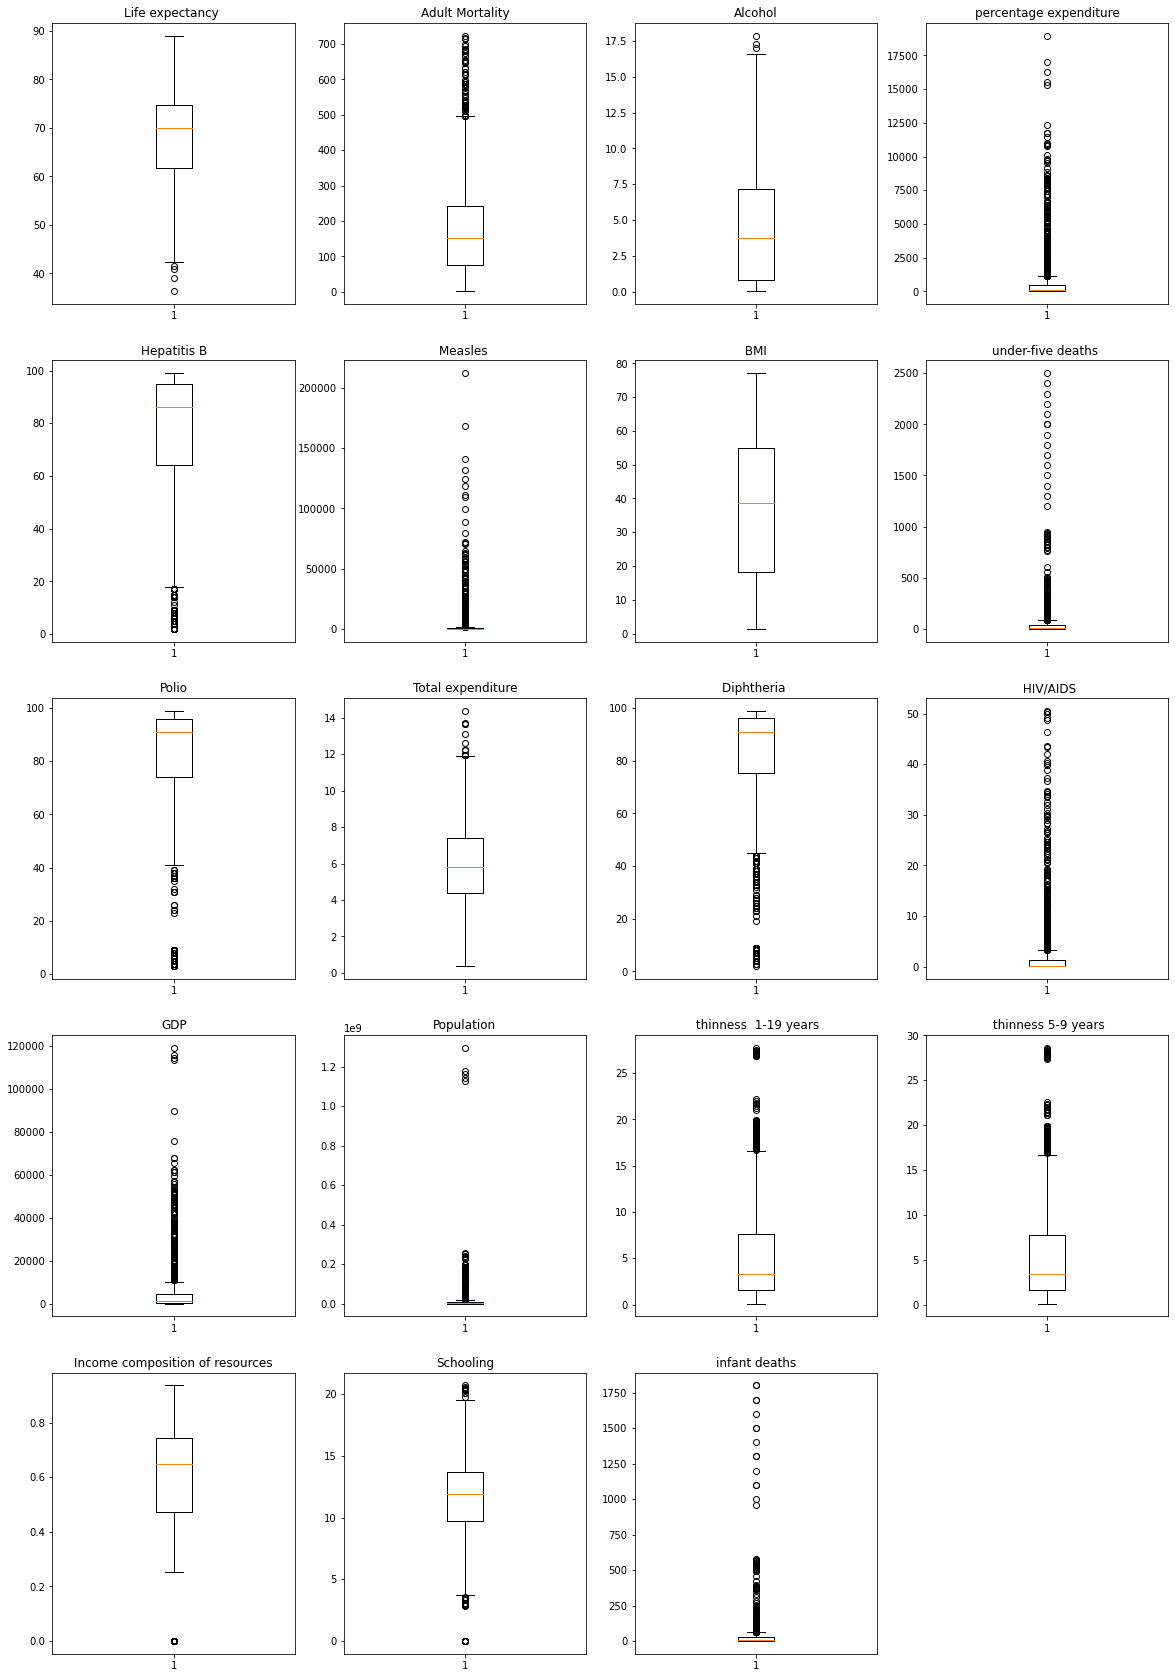

In [16]:
plt.figure(figsize=(20,30))

for variable,i in coldict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.title(variable)

plt.show()


In [17]:
for variable in coldict.keys():
    q75, q25 = np.percentile(data[variable], [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable,
                                                                             len((np.where((data[variable] > max_val) | (data[variable] < min_val))[0])),
                                                                             len((np.where((data[variable] > max_val) | (data[variable] < min_val))[0]))*100/1987))


Number of outliers and percentage of it in Life expectancy  : 4 and 0.20130850528434827
Number of outliers and percentage of it in Adult Mortality : 58 and 2.9189733266230498
Number of outliers and percentage of it in Alcohol : 3 and 0.1509813789632612
Number of outliers and percentage of it in percentage expenditure : 232 and 11.675893306492199
Number of outliers and percentage of it in Hepatitis B : 216 and 10.870659285354806
Number of outliers and percentage of it in Measles  : 361 and 18.16809260191243
Number of outliers and percentage of it in  BMI  : 0 and 0.0
Number of outliers and percentage of it in under-five deaths  : 227 and 11.424257674886764
Number of outliers and percentage of it in Polio : 159 and 8.002013085052843
Number of outliers and percentage of it in Total expenditure : 13 and 0.6542526421741318
Number of outliers and percentage of it in Diphtheria  : 195 and 9.813789632611979
Number of outliers and percentage of it in  HIV/AIDS : 309 and 15.551082033215904
Numbe

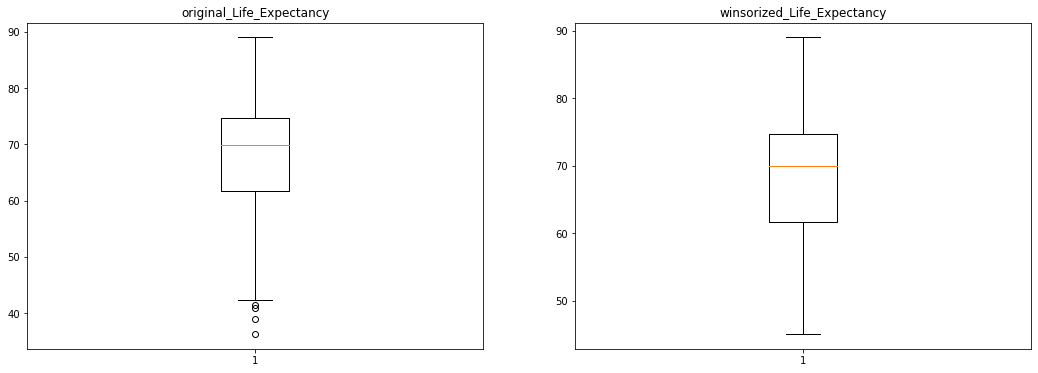

In [18]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Life_Expectancy = data['Life expectancy ']
plt.boxplot(original_Life_Expectancy)
plt.title("original_Life_Expectancy")

plt.subplot(1,2,2)
winsorized_Life_Expectancy = winsorize(data['Life expectancy '],(0.01,0))
plt.boxplot(winsorized_Life_Expectancy)
plt.title("winsorized_Life_Expectancy")

plt.show()

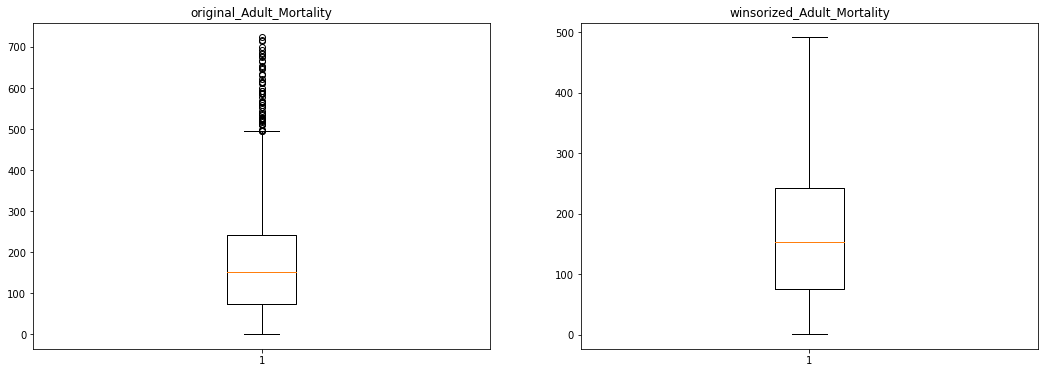

In [19]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Adult_Mortality = data['Adult Mortality']
plt.boxplot(original_Adult_Mortality)
plt.title("original_Adult_Mortality")

plt.subplot(1,2,2)
winsorized_Adult_Mortality = winsorize(data['Adult Mortality'],(0,0.03))
plt.boxplot(winsorized_Adult_Mortality)
plt.title("winsorized_Adult_Mortality")

plt.show()


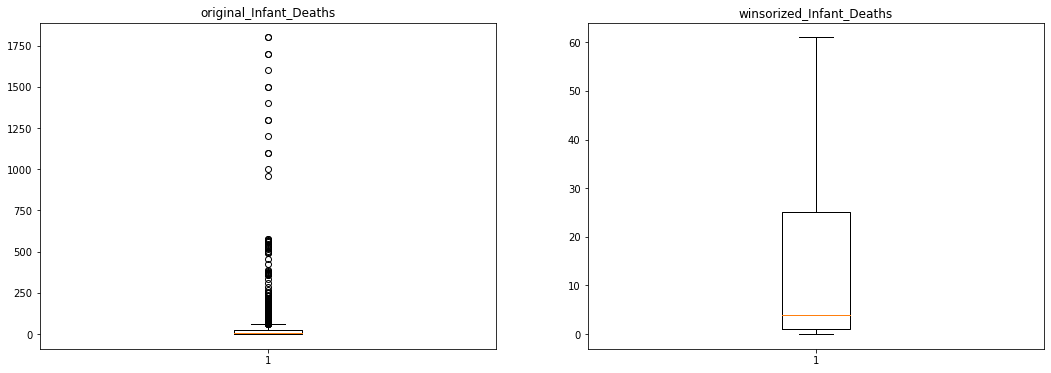

In [20]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Infant_Deaths = data['infant deaths']
plt.boxplot(original_Infant_Deaths)
plt.title("original_Infant_Deaths")

plt.subplot(1,2,2)
winsorized_Infant_Deaths = winsorize(data['infant deaths'],(0,0.10))
plt.boxplot(winsorized_Infant_Deaths)
plt.title("winsorized_Infant_Deaths")

plt.show()

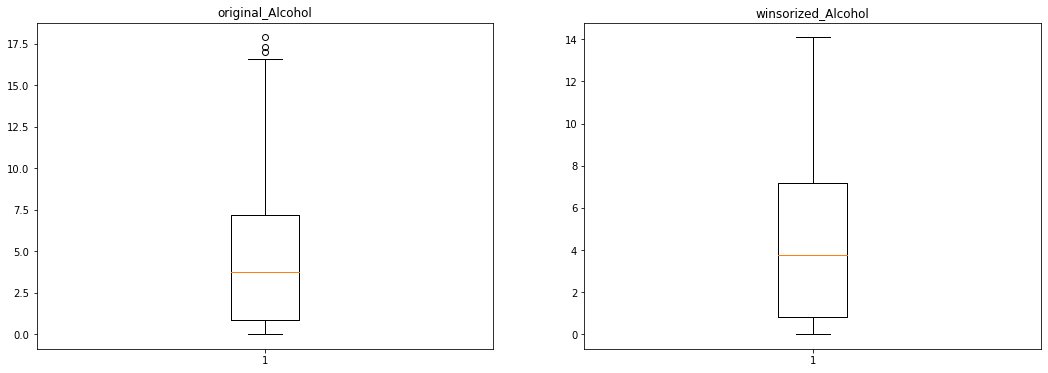

In [21]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Alcohol = data['Alcohol']
plt.boxplot(original_Alcohol)
plt.title("original_Alcohol")

plt.subplot(1,2,2)
winsorized_Alcohol = winsorize(data['Alcohol'],(0,0.01))
plt.boxplot(winsorized_Alcohol)
plt.title("winsorized_Alcohol")

plt.show()


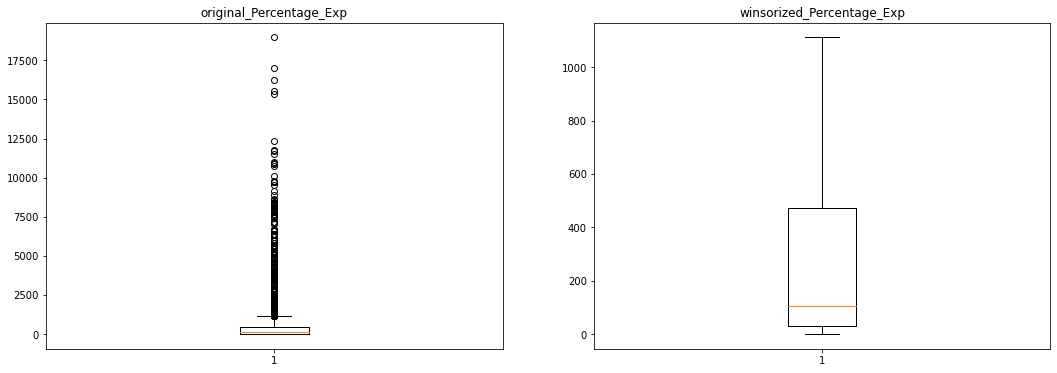

In [22]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Percentage_Exp = data['percentage expenditure']
plt.boxplot(original_Percentage_Exp)
plt.title("original_Percentage_Exp")

plt.subplot(1,2,2)
winsorized_Percentage_Exp = winsorize(data['percentage expenditure'],(0,0.12))
plt.boxplot(winsorized_Percentage_Exp)
plt.title("winsorized_Percentage_Exp")

plt.show()

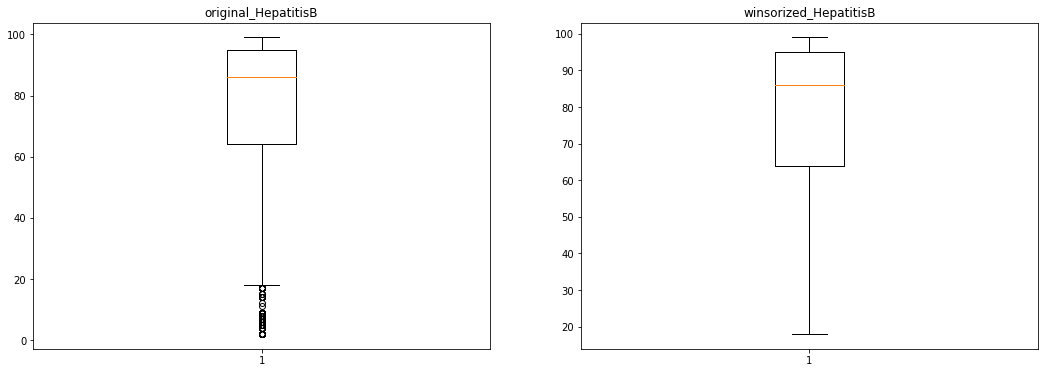

In [23]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HepatitisB = data['Hepatitis B']
plt.boxplot(original_HepatitisB)
plt.title("original_HepatitisB")

plt.subplot(1,2,2)
winsorized_HepatitisB = winsorize(data['Hepatitis B'],(0.11,0))
plt.boxplot(winsorized_HepatitisB)
plt.title("winsorized_HepatitisB")

plt.show()


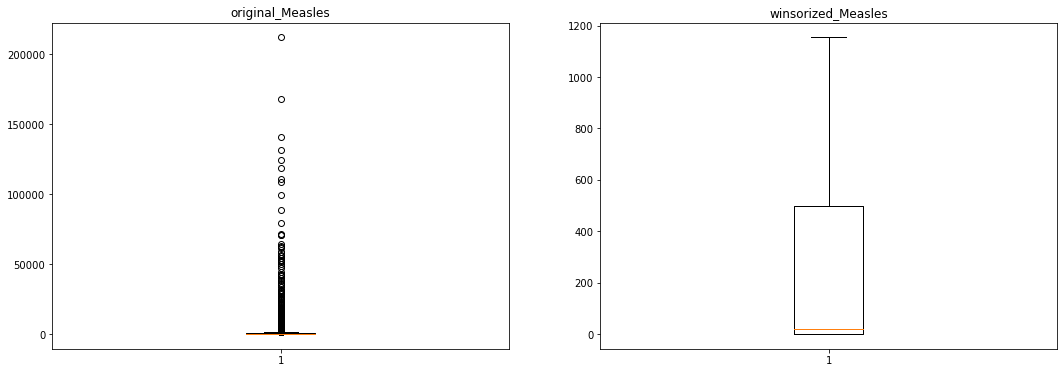

In [24]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Measles = data['Measles ']
plt.boxplot(original_Measles)
plt.title("original_Measles")

plt.subplot(1,2,2)
winsorized_Measles = winsorize(data['Measles '],(0,0.19))
plt.boxplot(winsorized_Measles)
plt.title("winsorized_Measles")

plt.show()


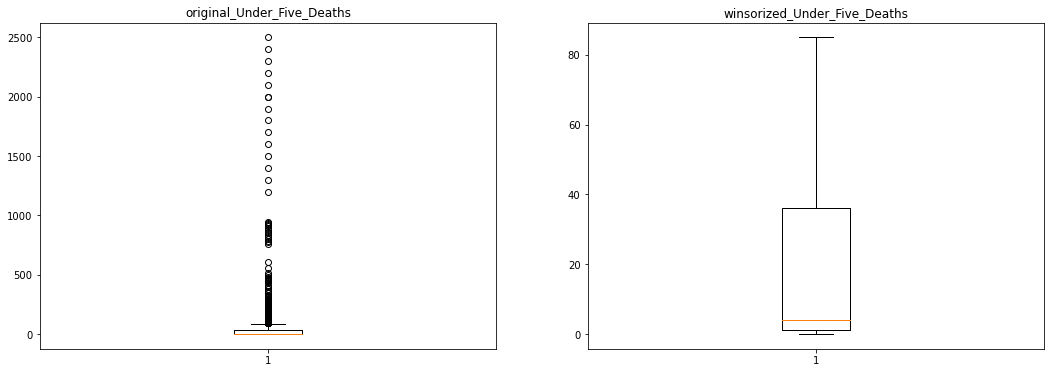

In [25]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Under_Five_Deaths = data['under-five deaths ']
plt.boxplot(original_Under_Five_Deaths)
plt.title("original_Under_Five_Deaths")

plt.subplot(1,2,2)
winsorized_Under_Five_Deaths = winsorize(data['under-five deaths '],(0,0.12))
plt.boxplot(winsorized_Under_Five_Deaths)
plt.title("winsorized_Under_Five_Deaths")

plt.show()


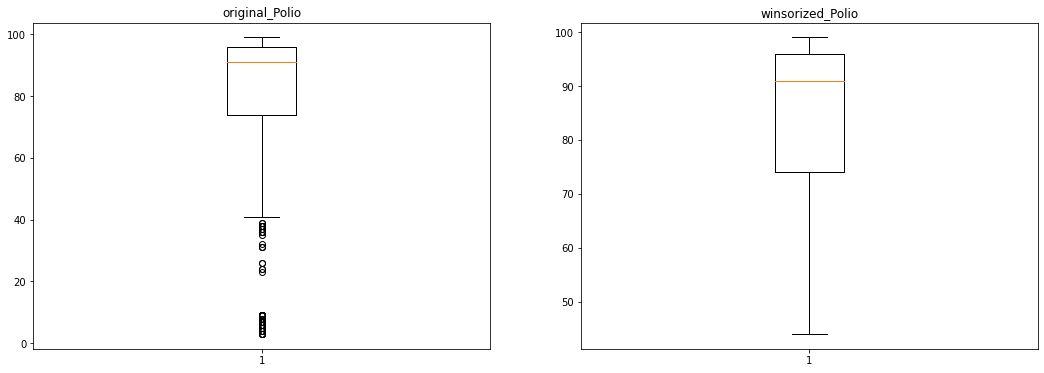

In [26]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Polio = data['Polio']
plt.boxplot(original_Polio)
plt.title("original_Polio")

plt.subplot(1,2,2)
winsorized_Polio = winsorize(data['Polio'],(0.09,0))
plt.boxplot(winsorized_Polio)
plt.title("winsorized_Polio")

plt.show()


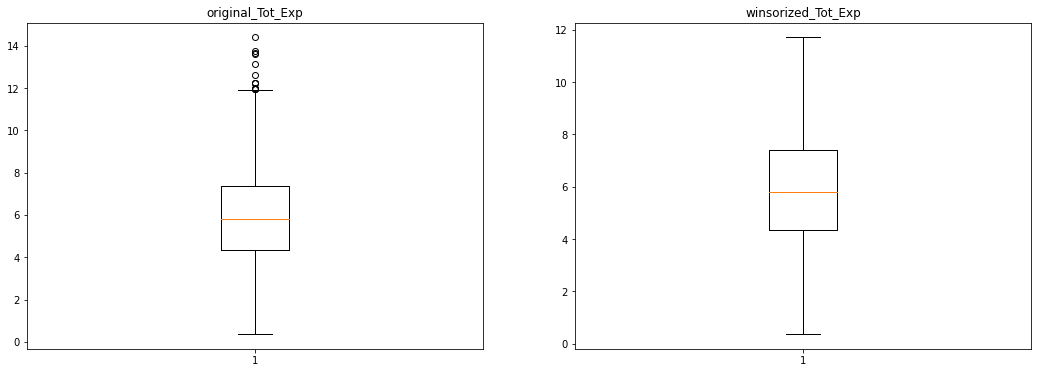

In [27]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Tot_Exp = data['Total expenditure']
plt.boxplot(original_Tot_Exp)
plt.title("original_Tot_Exp")

plt.subplot(1,2,2)
winsorized_Tot_Exp = winsorize(data['Total expenditure'],(0,0.01))
plt.boxplot(winsorized_Tot_Exp)
plt.title("winsorized_Tot_Exp")

plt.show()


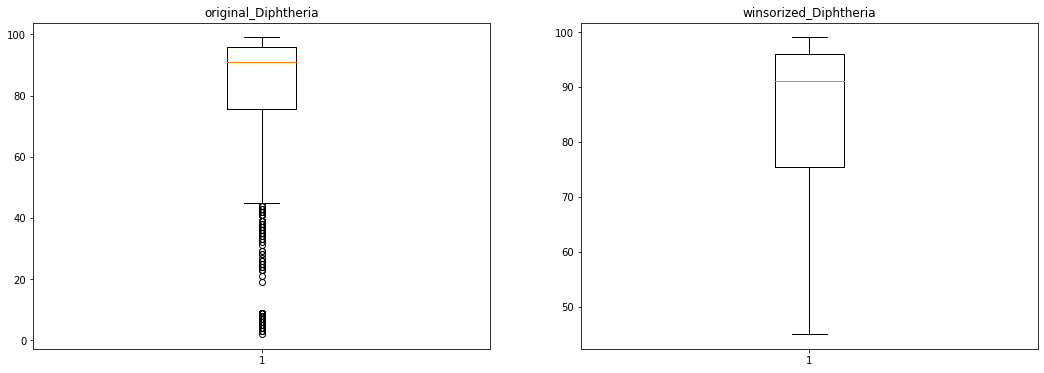

In [28]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Diphtheria = data['Diphtheria ']
plt.boxplot(original_Diphtheria)
plt.title("original_Diphtheria")

plt.subplot(1,2,2)
winsorized_Diphtheria = winsorize(data['Diphtheria '],(0.10,0))
plt.boxplot(winsorized_Diphtheria)
plt.title("winsorized_Diphtheria")

plt.show()


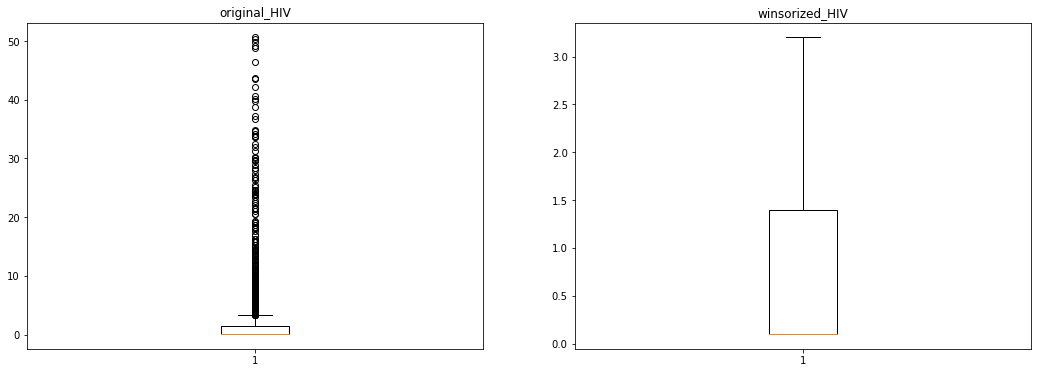

In [29]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HIV = data[' HIV/AIDS']
plt.boxplot(original_HIV)
plt.title("original_HIV")

plt.subplot(1,2,2)
winsorized_HIV = winsorize(data[' HIV/AIDS'],(0,0.16))
plt.boxplot(winsorized_HIV)
plt.title("winsorized_HIV")

plt.show()

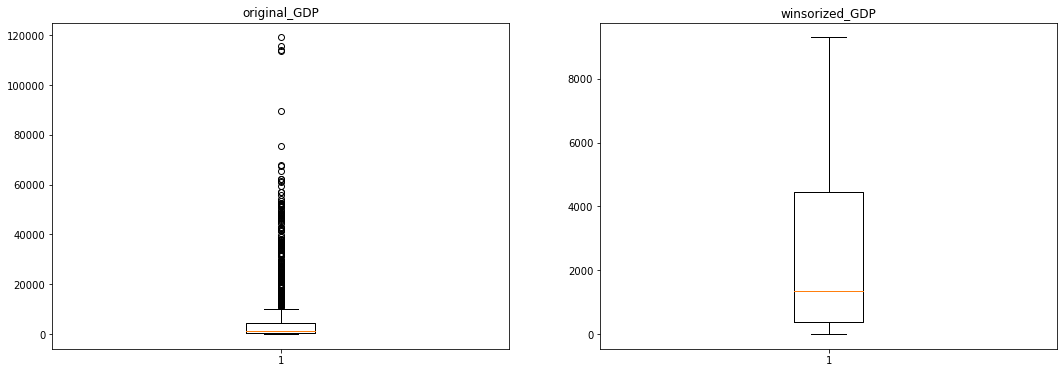

In [30]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_GDP = data['GDP']
plt.boxplot(original_GDP)
plt.title("original_GDP")

plt.subplot(1,2,2)
winsorized_GDP = winsorize(data['GDP'],(0,0.13))
plt.boxplot(winsorized_GDP)
plt.title("winsorized_GDP")

plt.show()


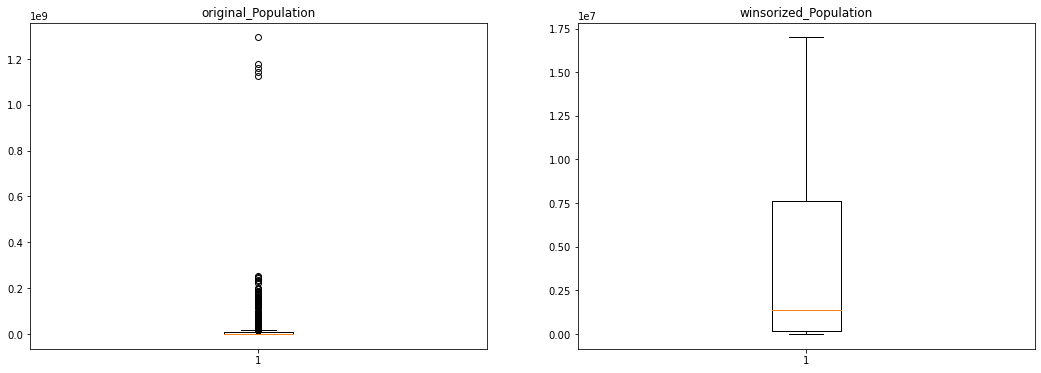

In [31]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Population = data['Population']
plt.boxplot(original_Population)
plt.title("original_Population")

plt.subplot(1,2,2)
winsorized_Population = winsorize(data['Population'],(0,0.14))
plt.boxplot(winsorized_Population)
plt.title("winsorized_Population")

plt.show()

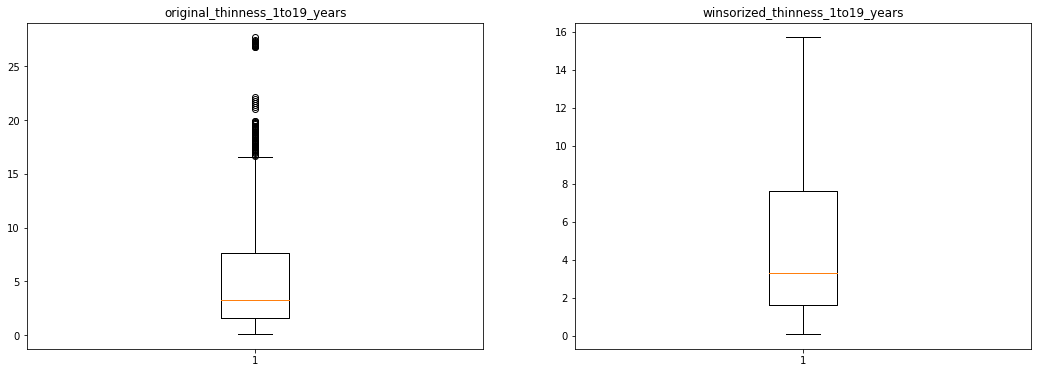

In [32]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_1to19_years = data[' thinness  1-19 years']
plt.boxplot(original_thinness_1to19_years)
plt.title("original_thinness_1to19_years")

plt.subplot(1,2,2)
winsorized_thinness_1to19_years = winsorize(data[' thinness  1-19 years'],(0,0.04))
plt.boxplot(winsorized_thinness_1to19_years)
plt.title("winsorized_thinness_1to19_years")

plt.show()


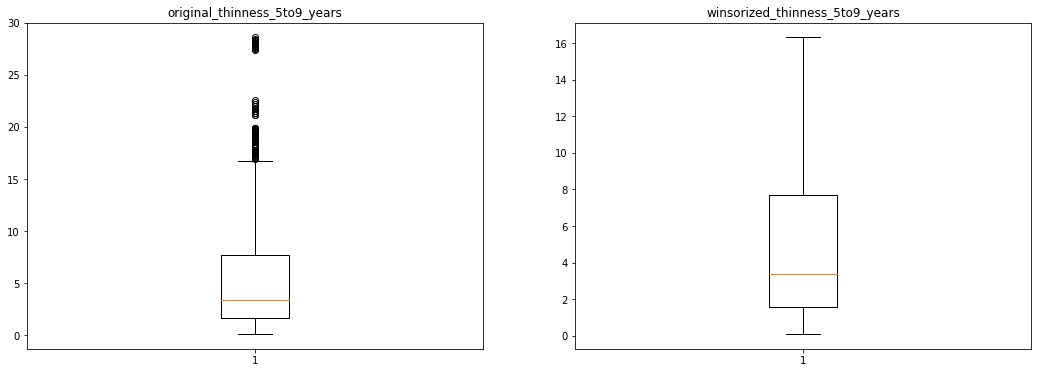

In [33]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_5to9_years = data[' thinness 5-9 years']
plt.boxplot(original_thinness_5to9_years)
plt.title("original_thinness_5to9_years")

plt.subplot(1,2,2)
winsorized_thinness_5to9_years = winsorize(data[' thinness 5-9 years'],(0,0.04))
plt.boxplot(winsorized_thinness_5to9_years)
plt.title("winsorized_thinness_5to9_years")

plt.show()


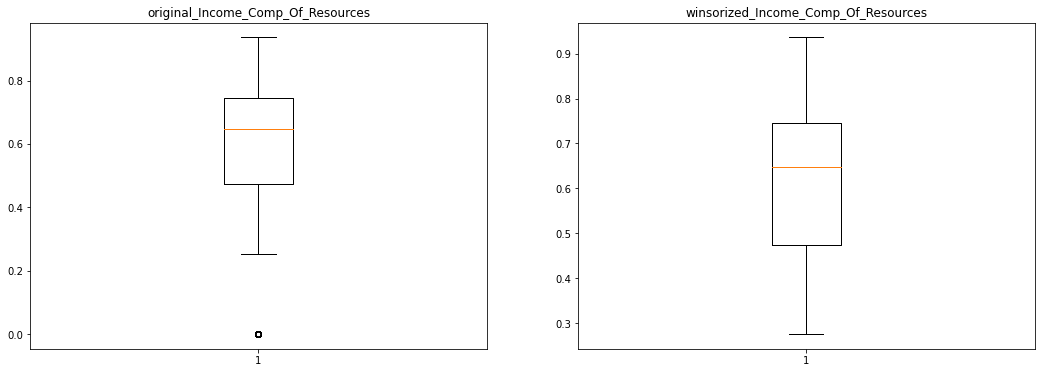

In [34]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Income_Comp_Of_Resources = data['Income composition of resources']
plt.boxplot(original_Income_Comp_Of_Resources)
plt.title("original_Income_Comp_Of_Resources")

plt.subplot(1,2,2)
winsorized_Income_Comp_Of_Resources = winsorize(data['Income composition of resources'],(0.05,0))
plt.boxplot(winsorized_Income_Comp_Of_Resources)
plt.title("winsorized_Income_Comp_Of_Resources")

plt.show()

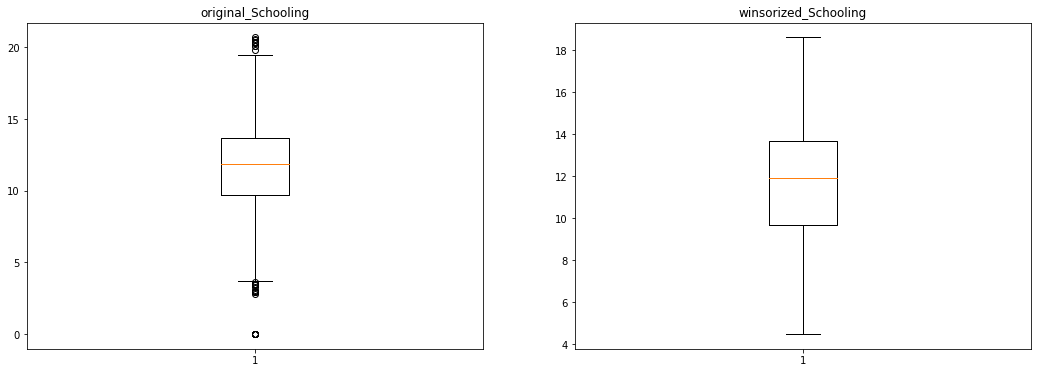

In [35]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Schooling = data['Schooling']
plt.boxplot(original_Schooling)
plt.title("original_Schooling")

plt.subplot(1,2,2)
winsorized_Schooling = winsorize(data['Schooling'],(0.02,0.01))
plt.boxplot(winsorized_Schooling)
plt.title("winsorized_Schooling")

plt.show()


In [36]:
winsorized_list = [winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Alcohol,winsorized_Measles,winsorized_Infant_Deaths,
            winsorized_Percentage_Exp,winsorized_HepatitisB,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling]

for variable in winsorized_list:
    q75, q25 = np.percentile(variable, [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    print("Number of outliers after winsorization in  : {} ".format(len(np.where((variable > max_val) | (variable < min_val))[0])))

Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 


In [37]:
data['winsorized_Life_Expectancy'] = winsorized_Life_Expectancy
data['winsorized_Adult_Mortality'] = winsorized_Adult_Mortality
data['winsorized_Infant_Deaths'] = winsorized_Infant_Deaths
data['winsorized_Alcohol'] = winsorized_Alcohol
data['winsorized_Percentage_Exp'] = winsorized_Percentage_Exp
data['winsorized_HepatitisB'] = winsorized_HepatitisB
data['winsorized_Under_Five_Deaths'] = winsorized_Under_Five_Deaths
data['winsorized_Polio'] = winsorized_Polio
data['winsorized_Tot_Exp'] = winsorized_Tot_Exp
data['winsorized_Diphtheria'] = winsorized_Diphtheria
data['winsorized_HIV'] = winsorized_HIV
data['winsorized_GDP'] = winsorized_GDP
data['winsorized_Population'] = winsorized_Population
data['winsorized_thinness_1to19_years'] = winsorized_thinness_1to19_years
data['winsorized_thinness_5to9_years'] = winsorized_thinness_5to9_years
data['winsorized_Income_Comp_Of_Resources'] = winsorized_Income_Comp_Of_Resources
data['winsorized_Schooling'] = winsorized_Schooling
data['winsorized_Measles'] = winsorized_Measles

In [38]:
data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   winsorized_Tot_Exp  winsorized_Diphtheria  winsorized_HIV  winsorized_GDP  \
0                8.16                   65.0             0.1      584.259210   
1                8.18                   62.0             0.1      612.696514   
2                8.13                   64.0             0.1      631.744976   
3                8.52                   67.0             0.1      669.959000   
4                7.87                   68.0             0.1       63.537231   

   winsorized_Population  winsorized_thinness_1to19_years  \
0             16993354.0                             15.7   
1               327582.0                             15.7   
2             16993354.0                             15.7   
3              3696958.0                             15.7   
4              2978599.0                             15.7   

   winsorized_thinness_5to9_years  winsorized_Income_Comp_Of_Resources  \
0                            16.3                                0.479   
1                            16.3                                0.476   
2                            16.3                                0.470   
3                            16.3                                0.463   
4                            16.3                                0.454   

   winsorized_Schooling  winsorized_Measles  
0                  10.1                1154  
1                  10.0                 492  
2                   9.9                 430  
3                   9.8                1154  
4                   9.5                1154  

[5 rows x 40 columns]

In [39]:
data.shape

(1987, 40)

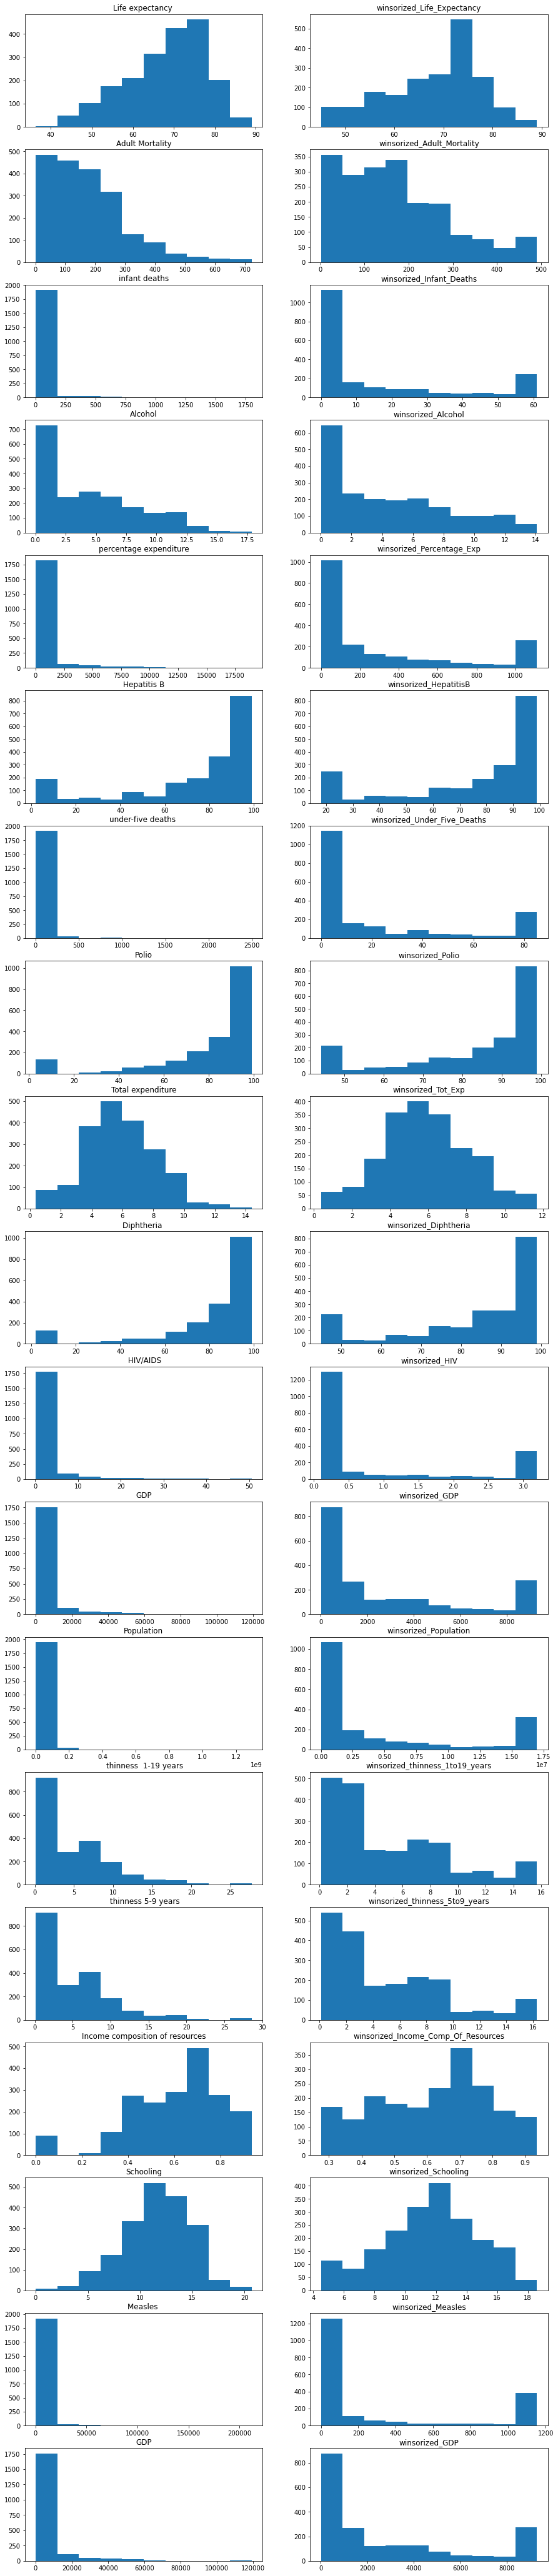

In [40]:
all_col = ['Life expectancy ','winsorized_Life_Expectancy','Adult Mortality','winsorized_Adult_Mortality','infant deaths',
         'winsorized_Infant_Deaths','Alcohol','winsorized_Alcohol','percentage expenditure','winsorized_Percentage_Exp','Hepatitis B',
         'winsorized_HepatitisB','under-five deaths ','winsorized_Under_Five_Deaths','Polio','winsorized_Polio','Total expenditure',
         'winsorized_Tot_Exp','Diphtheria ','winsorized_Diphtheria',' HIV/AIDS','winsorized_HIV','GDP','winsorized_GDP',
         'Population','winsorized_Population',' thinness  1-19 years','winsorized_thinness_1to19_years',' thinness 5-9 years',
         'winsorized_thinness_5to9_years','Income composition of resources','winsorized_Income_Comp_Of_Resources',
         'Schooling','winsorized_Schooling','Measles ','winsorized_Measles','GDP','winsorized_GDP']

plt.figure(figsize=(15,75))

for i in range(len(all_col)):
    plt.subplot(19,2,i+1)
    plt.hist(data[all_col[i]])
    plt.title(all_col[i])

plt.show()


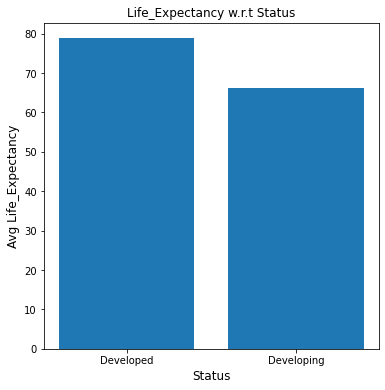

In [41]:
plt.figure(figsize=(6,6))
plt.bar(data.groupby('Status')['Status'].count().index,data.groupby('Status')['winsorized_Life_Expectancy'].mean())
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Status")
plt.show()


In [42]:
import seaborn as sns

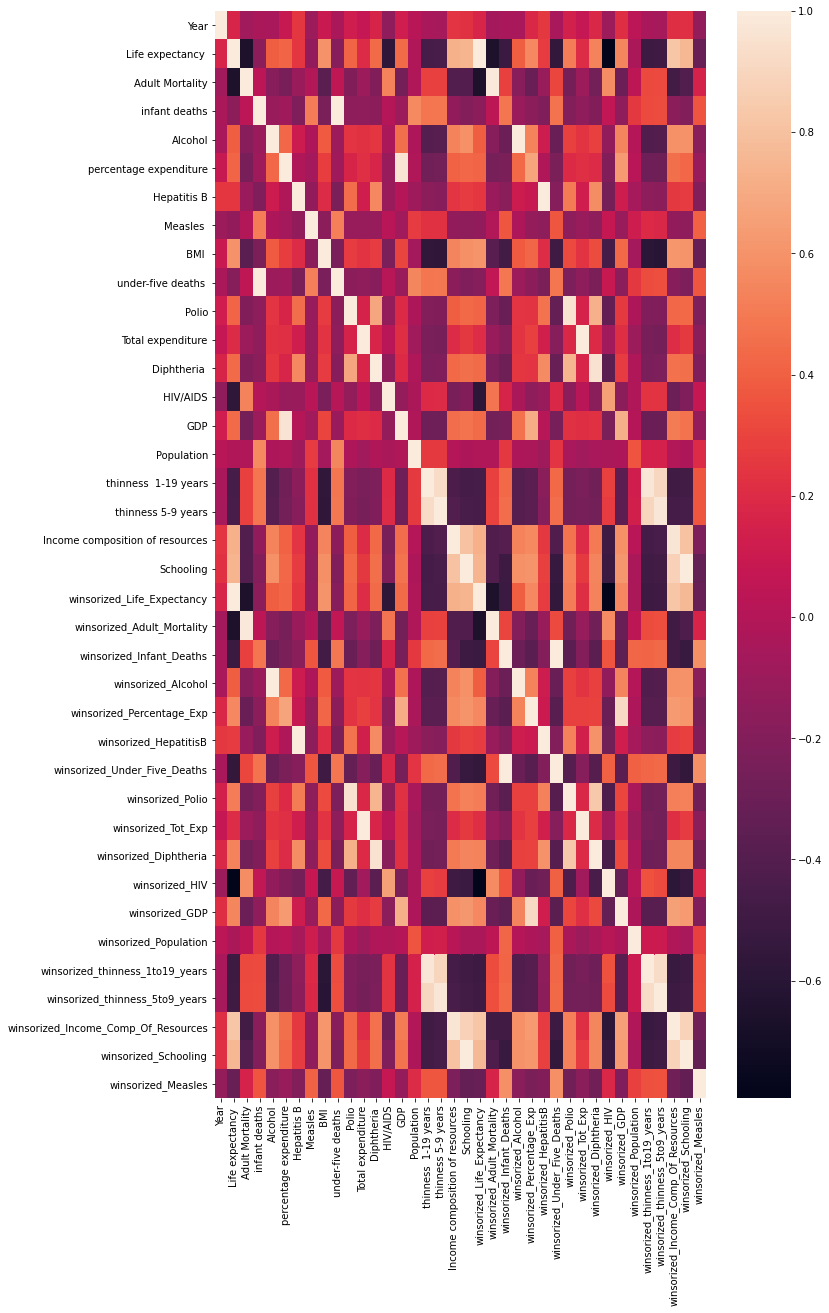

In [43]:
plt.figure(figsize=(11,20))
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

**2)Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve average lifespan?**

In [44]:
# First we will select the data set having a lower life expectancy value(<65) from the Data.
rslt_df = data[data['winsorized_Life_Expectancy'] < 65] 
print('\nResult dataframe :\n', rslt_df) 



Result dataframe :
           Country  Year      Status  Life expectancy   Adult Mortality  \
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
5     Afghanistan  2010  Developing              58.8            279.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
1          

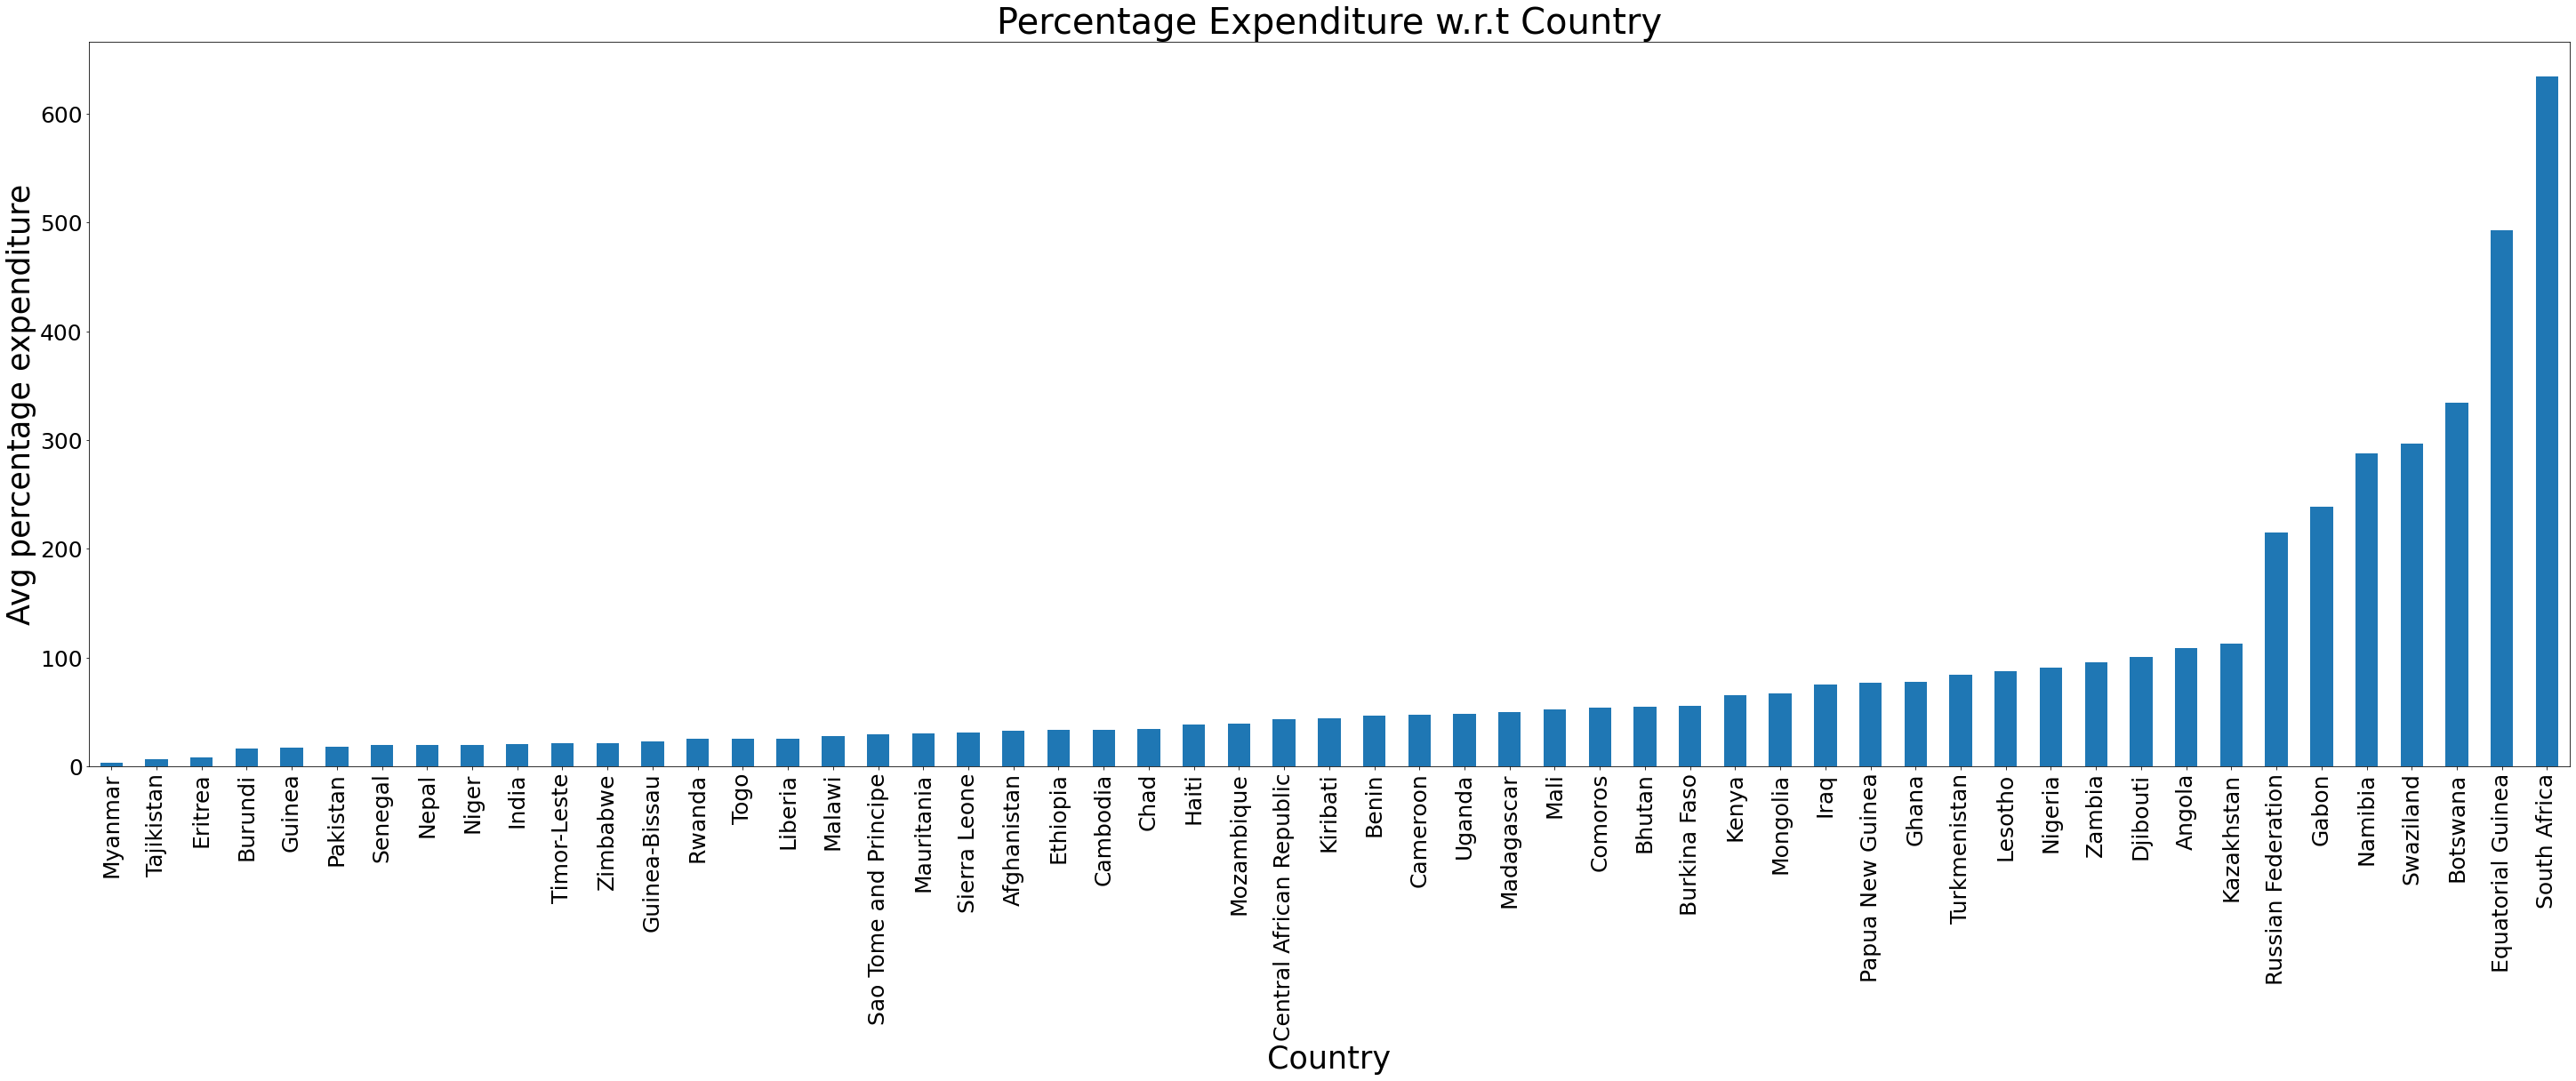

In [45]:
# ploting a bar graph having Life expectancy <65 Percentage Expenditure on health w.r.t Country.
le_country = rslt_df.groupby('Country')['winsorized_Percentage_Exp'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Percentage Expenditure w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg percentage expenditure",fontsize=35)
plt.show()


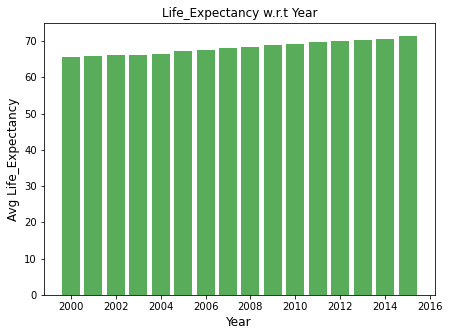

In [46]:
plt.figure(figsize=(7,5))
plt.bar(data.groupby('Year')['Year'].count().index,data.groupby('Year')['winsorized_Life_Expectancy'].mean(),color='green',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Year")
plt.show()


# Task 3

**3)How does Infant and Adult mortality rates affect life expectancy?**

Text(0.5, 1.0, 'LifeExpectancy vs Infant_Deaths')

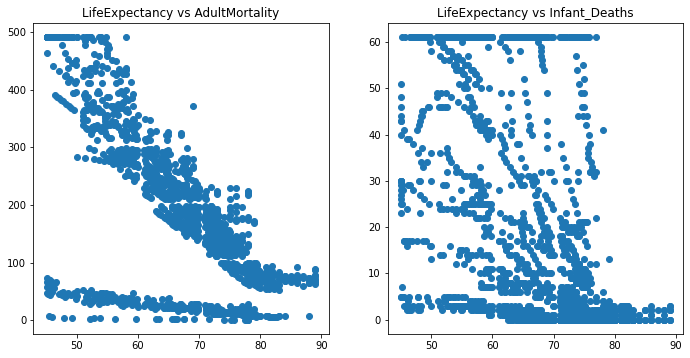

In [47]:
plt.figure(figsize=(18,40))

plt.subplot(6,3,1)
plt.scatter(data["winsorized_Life_Expectancy"], data["winsorized_Adult_Mortality"])
plt.title("LifeExpectancy vs AdultMortality")

plt.subplot(6,3,2)
plt.scatter(data["winsorized_Life_Expectancy"], data["winsorized_Infant_Deaths"])
plt.title("LifeExpectancy vs Infant_Deaths")


**4)Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.**

In [48]:
print(corr['winsorized_Life_Expectancy'].sort_values(ascending=False))

winsorized_Life_Expectancy             1.000000
Life expectancy                        0.999564
winsorized_Income_Comp_Of_Resources    0.823222
winsorized_Schooling                   0.762333
Schooling                              0.746461
Income composition of resources        0.728270
 BMI                                   0.601434
winsorized_Percentage_Exp              0.557117
winsorized_GDP                         0.551722
winsorized_Diphtheria                  0.535687
winsorized_Polio                       0.516167
GDP                                    0.445022
Diphtheria                             0.443489
Polio                                  0.415868
percentage expenditure                 0.415074
winsorized_Alcohol                     0.396073
Alcohol                                0.394380
winsorized_HepatitisB                  0.268086
Hepatitis B                            0.250284
winsorized_Tot_Exp                     0.208400
Total expenditure                      0

**From the above Corrleation matrix we can clearly noticed that Life Expectancy has positive or negative correlation with some of the variable**

**5)What is the impact of schooling on the lifespan of humans?**

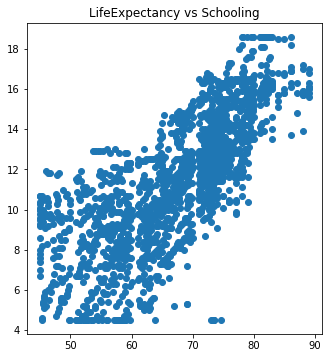

In [49]:
plt.figure(figsize=(18,40))

plt.subplot(6,3,16)
plt.scatter(data["winsorized_Life_Expectancy"], data["winsorized_Schooling"])
plt.title("LifeExpectancy vs Schooling")


plt.show()


**Does Life Expectancy have positive or negative relationship with drinking alcohol?**

Text(0.5, 1.0, 'LifeExpectancy vs Alcohol')

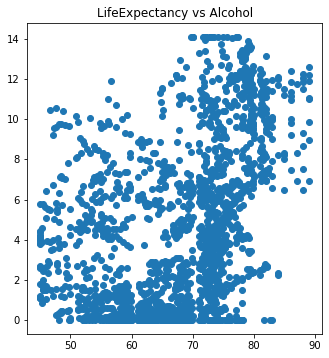

In [50]:
plt.figure(figsize=(18,40))

plt.subplot(6,3,3)
plt.scatter(data["winsorized_Life_Expectancy"], data["winsorized_Alcohol"])
plt.title("LifeExpectancy vs Alcohol")

**Do densely populated countries tend to have lower life expectancy?**

In [51]:
df = data.groupby('winsorized_Life_Expectancy' and 'Country').sum()
df.sort_values(["winsorized_Population"], axis=0,ascending=False, inplace=True) 


In [52]:
df["winsorized_Population"].head()

Country
India        229682699.0
Indonesia    225235113.0
Chile        215735467.0
Nigeria      196976244.0
Brazil       193025197.0
Name: winsorized_Population, dtype: float64

In [53]:
df['winsorized_Life_Expectancy'].head()

Country
India         978.4
Indonesia    1011.8
Chile        1186.2
Nigeria       767.2
Brazil       1099.1
Name: winsorized_Life_Expectancy, dtype: float64

In [54]:
df.head()

Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
Country                                                                       
India      30105             978.4           2164.0          20957    29.13   
Indonesia  30105            1011.8           2489.0           2305     1.03   
Chile      30105            1186.2            936.0             30   104.67   
Nigeria    30105             767.2           3632.0           8088   129.70   
Brazil     30105            1099.1           2269.0           1050   108.20   

           percentage expenditure  Hepatitis B  Measles    BMI   \
Country                                                           
India                  531.881937        357.0    652880  218.0   
Indonesia             1340.293049       1099.0    244820  291.9   
Chile                12408.653005       1245.0         8  825.6   
Nigeria               1367.108405        513.0    814040  290.6   
Brazil                6251.129523       1443.0      1312  696.9   

           under-five deaths   ...  winsorized_Tot_Exp  winsorized_Diphtheria  \
Country                        ...                                              
India                   27900  ...               65.38                 1024.0   
Indonesia                2850  ...               39.95                 1118.0   
Chile                      33  ...              103.67                 1361.0   
Nigeria                 12886  ...               55.66                  718.0   
Brazil                   1189  ...              120.29                 1471.0   

           winsorized_HIV  winsorized_GDP  winsorized_Population  \
Country                                                            
India                 3.9    11793.532035            229682699.0   
Indonesia             2.9    23369.701669            225235113.0   
Chile                 1.5    67073.808366            215735467.0   
Nigeria              48.0    19107.080063            196976244.0   
Brazil                1.5    77798.197832            193025197.0   

           winsorized_thinness_1to19_years  winsorized_thinness_5to9_years  \
Country                                                                      
India                                235.5                           244.5   
Indonesia                             53.3                            61.9   
Chile                                 13.4                            13.8   
Nigeria                              156.9                           156.2   
Brazil                                46.1                            45.6   

           winsorized_Income_Comp_Of_Resources  winsorized_Schooling  \
Country                                                                
India                                    8.177                 148.1   
Indonesia                                9.577                 172.9   
Chile                                   11.976                 222.1   
Nigeria                                  6.457                 134.0   
Brazil                                  10.609                 211.4   

           winsorized_Measles  
Country                        
India                   17310  
Indonesia               17310  
Chile                       8  
Nigeria                 16860  
Brazil                   1312  

[5 rows x 38 columns]

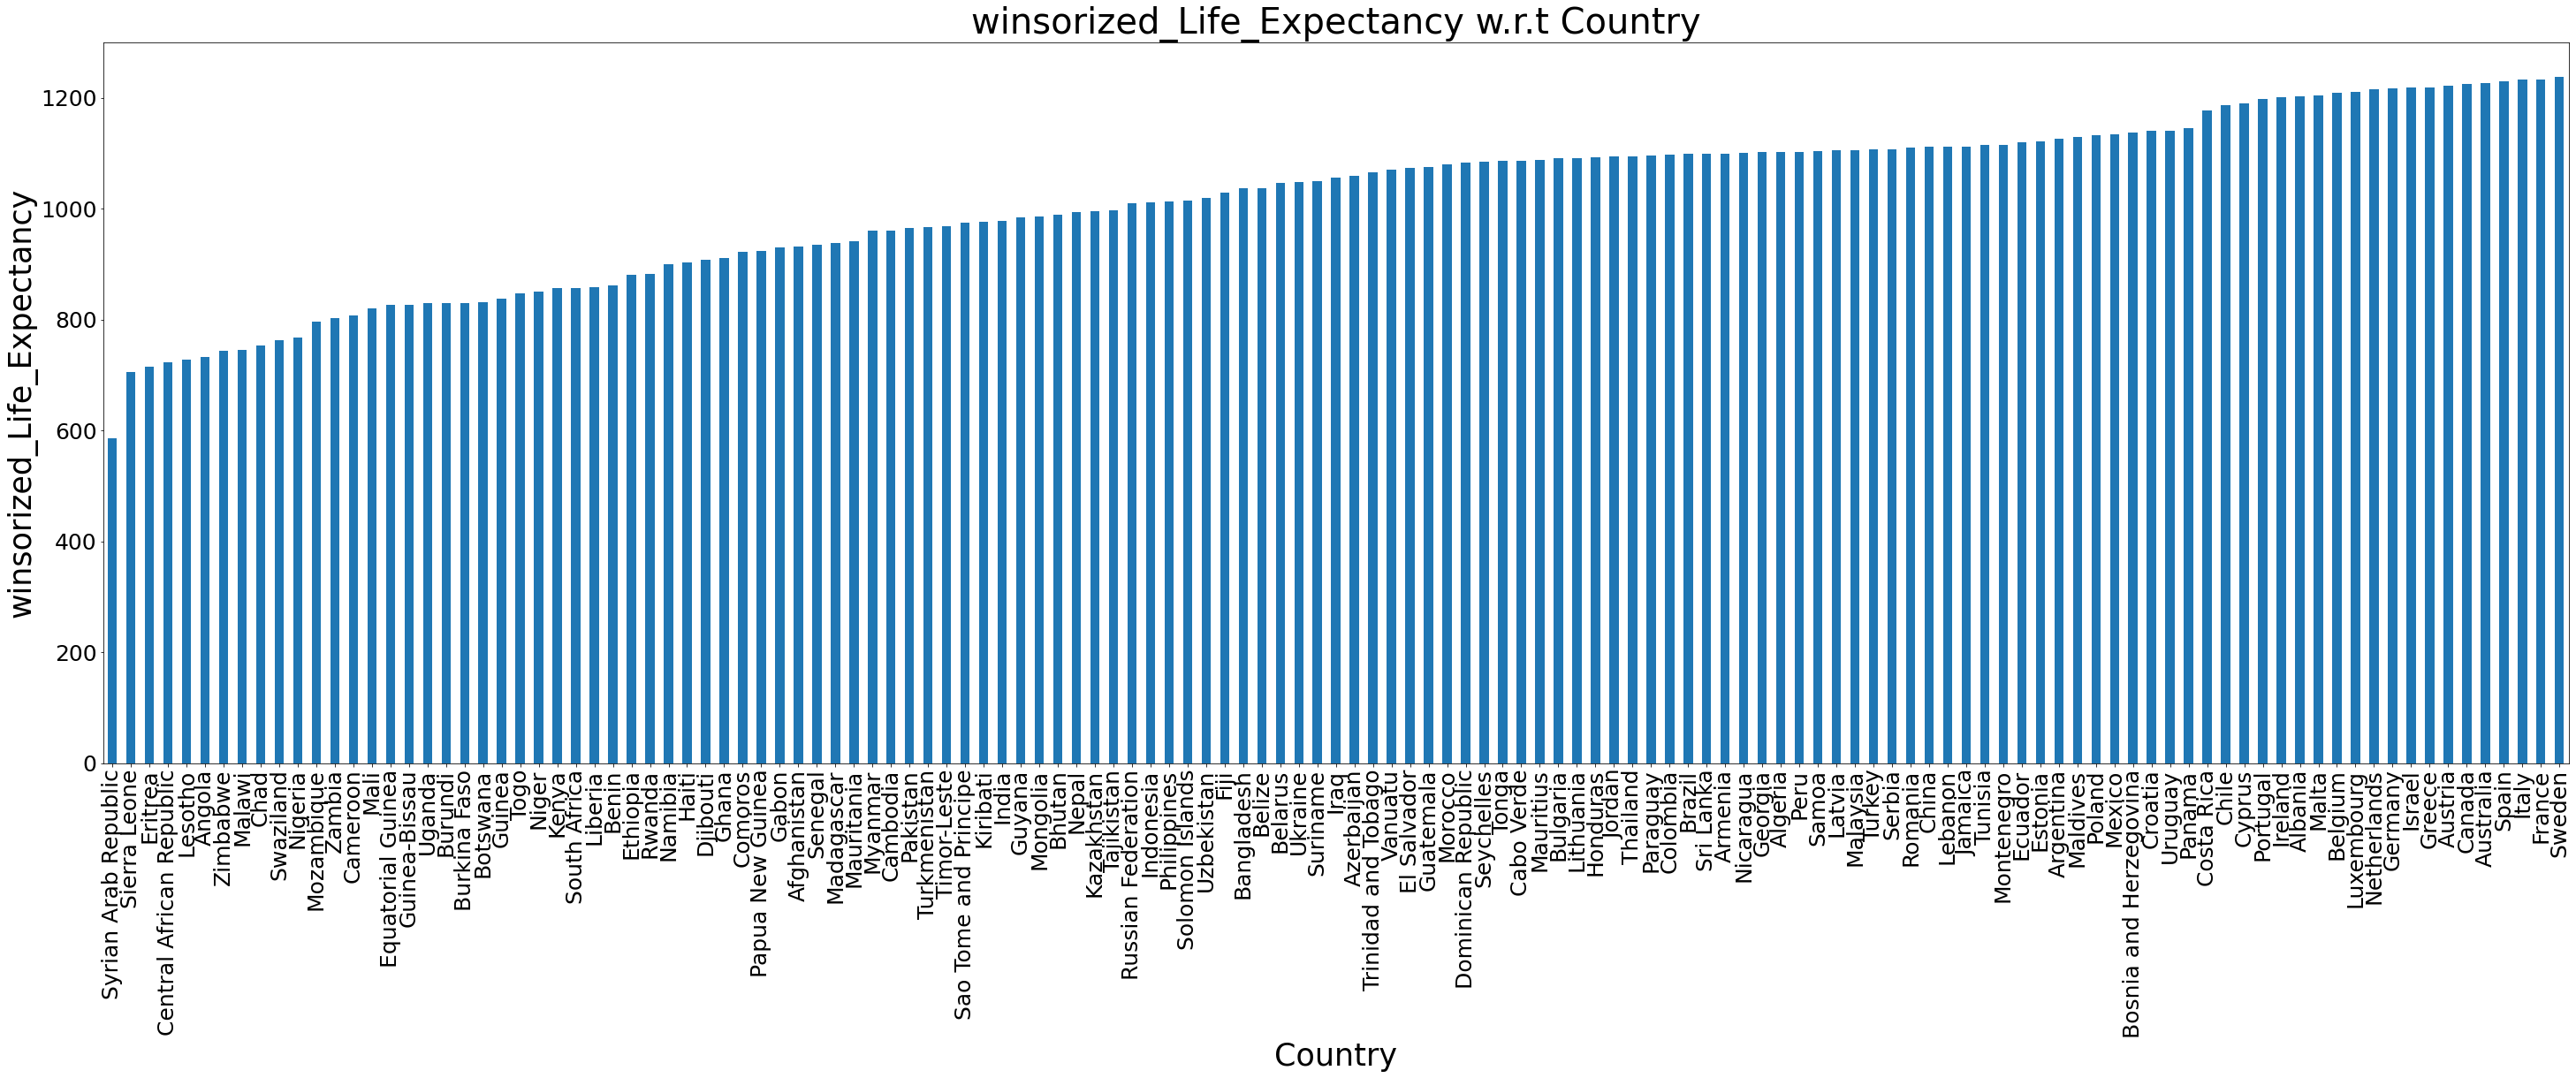

In [55]:
le_country = df.groupby('Country')['winsorized_Life_Expectancy'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("winsorized_Life_Expectancy w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("winsorized_Life_Expectancy",fontsize=35)
plt.show()


In [56]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Life expectancy')

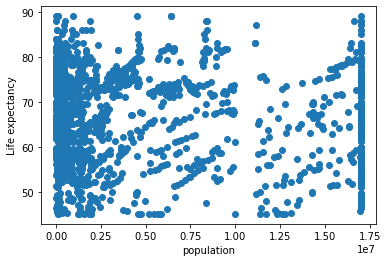

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111)
# Some random colours: 
colours = range(len(Country_list))
ax.scatter(winsorized_Population, winsorized_Life_Expectancy)
ax.set_xlabel('population')
ax.set_ylabel('Life expectancy')


In [59]:
pip install plotly-express

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=9339406fc64cf4ef686bb4ad7660143fcbadeb61a65d31409e2ef0dfd3d20a61
  Stored in directory: c:\users\rahul\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [60]:
import plotly.express as px 

fig = px.scatter(data,
                 x="winsorized_Population",
                 y="winsorized_Life_Expectancy",
                 size="winsorized_Population",
                 size_max=60,
                 hover_name="Country",
                 color_discrete_sequence=["#FF69B4", "#87CEFA",
                                          "#FFFF00", "#32CD32"],
                 range_y=[50, 90],
                 width=6000,
                 
                 opacity=1
                 )

fig.layout.xaxis.update(matches=None)
fig.show()

****What is the impact of Immunization coverage on life Expectancy?****

In [61]:
data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   winsorized_Tot_Exp  winsorized_Diphtheria  winsorized_HIV  winsorized_GDP  \
0                8.16                   65.0             0.1      584.259210   
1                8.18                   62.0             0.1      612.696514   
2                8.13                   64.0             0.1      631.744976   
3                8.52                   67.0             0.1      669.959000   
4                7.87                   68.0             0.1       63.537231   

   winsorized_Population  winsorized_thinness_1to19_years  \
0             16993354.0                             15.7   
1               327582.0                             15.7   
2             16993354.0                             15.7   
3              3696958.0                             15.7   
4              2978599.0                             15.7   

   winsorized_thinness_5to9_years  winsorized_Income_Comp_Of_Resources  \
0                            16.3                                0.479   
1                            16.3                                0.476   
2                            16.3                                0.470   
3                            16.3                                0.463   
4                            16.3                                0.454   

   winsorized_Schooling  winsorized_Measles  
0                  10.1                1154  
1                  10.0                 492  
2                   9.9                 430  
3                   9.8                1154  
4                   9.5                1154  

[5 rows x 40 columns]

Text(0.5, 1.0, 'LifeExpectancy vs Diphtheria')

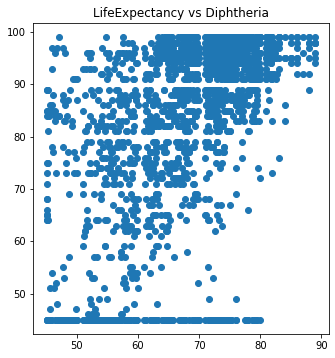

In [62]:
plt.figure(figsize=(18,40))

plt.subplot(6,3,3)
plt.scatter(data["winsorized_Life_Expectancy"], data["winsorized_Diphtheria"])
plt.title("LifeExpectancy vs Diphtheria")

In [63]:
import plotly.express as px 

fig = px.scatter(data,
                 x="winsorized_Diphtheria",
                 y="winsorized_Life_Expectancy",
                 size="winsorized_Population",
                 size_max=60,
                 hover_name="Country",
                 color_discrete_sequence=["#FF69B4", "#87CEFA",
                                          "#FFFF00", "#32CD32"],
                 range_y=[50, 90],
                 width=6000,
                 
                 opacity=1
                 )

fig.layout.xaxis.update(matches=None)
fig.show()

In [64]:
import plotly.express as px 

fig = px.scatter(data,
                 x="winsorized_Polio",
                 y="winsorized_Life_Expectancy",
                 size="winsorized_Life_Expectancy",
                 size_max=60,
                 hover_name="Country",
                 color_discrete_sequence=["#FF69B4", "#87CEFA",
                                          "#FFFF00", "#32CD32"],
                 range_y=[50, 90],
                 width=6000,
                 
                 opacity=1
                 )

fig.layout.xaxis.update(matches=None)
fig.show()

In [65]:
import plotly.express as px 

fig = px.scatter(data,
                 x="winsorized_HIV",
                 y="winsorized_Life_Expectancy",
                 size="winsorized_Life_Expectancy",
                 size_max=60,
                 hover_name="Country",
                 color_discrete_sequence=["#FF69B4", "#87CEFA",
                                          "#FFFF00", "#32CD32"],
                 range_y=[50, 90],
                 width=6000,
                 
                 opacity=1
                 )

fig.layout.xaxis.update(matches=None)
fig.show()